#### 2. Problema: Leonardo da Vinci y la relación entre la distancia entre los brazos extendidos y la estatura

Para probar lo dicho por él, usen la base de datos de los 1500 estudiantes del Census at School.

**Pasos:**

1. Traza una gráfica de dispersión para la distancia entre los brazos extendidos y estatura. Usa la misma escala en los ejes horizontal y vertical. Describe la relación entre las dos variables.
2. Si da Vinci estaba en lo correcto y la distancia entre los brazos extendidos de una persona es casi igual a la estatura de esa persona, ¿cuál debe ser la pendiente de la recta de regresión?
3. Calcula la recta de regresión para predecir la estatura con base en la distancia entre los brazos extendidos de una persona. ¿El valor de la pendiente confirma las conclusiones del inciso anterior?
4. Si una persona tiene una distancia de 67 pulgadas entre los brazos extendidos, ¿cuál sería el pronóstico respecto a la estatura de la persona?
5. ¿Los datos dan suficiente evidencia para indicar que hay una relación lineal entre distancia y estatura? Prueba al nivel de significancia de 5 %.
6. Construye un intervalo de confianza de 95 % para la pendiente de la recta de medias.
7. Si Leonardo da Vinci tenía razón y la distancia entre los brazos extendidos de una persona es casi igual a la estatura de esa persona, ¿el intervalo de confianza construido en el inciso anterior confirma esta suposición? Explica.

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from tabulate import tabulate
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

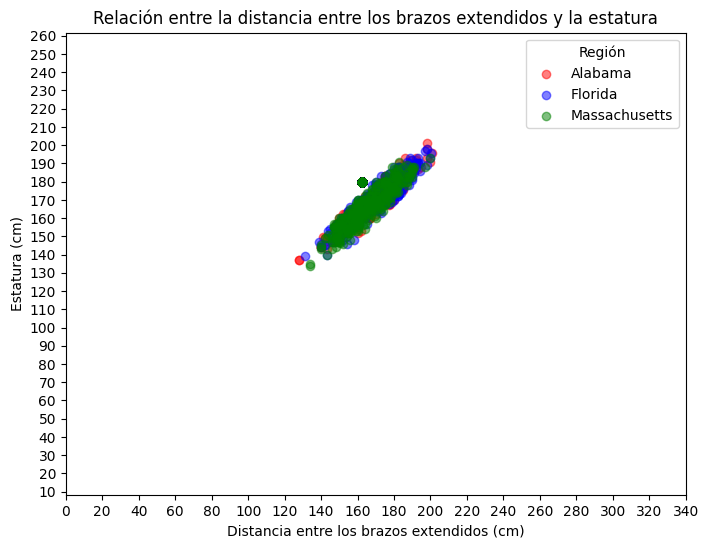


La relación entre la estatura y la distancia entre los brazos extendidos puede ser descrita de la siguiente manera:

╒═════════════════════════════╤═════════╤═══════════════════════╤══════════╤══════════╕
│ Variable                    │   Media │   Desviación estándar │   Mínimo │   Máximo │
╞═════════════════════════════╪═════════╪═══════════════════════╪══════════╪══════════╡
│ Estatura (cm)               │ 171.742 │               11.3235 │      134 │      201 │
├─────────────────────────────┼─────────┼───────────────────────┼──────────┼──────────┤
│ Distancia entre brazos (cm) │ 167.19  │               11.8184 │      128 │      201 │
╘═════════════════════════════╧═════════╧═══════════════════════╧══════════╧══════════╛

Esto proporciona una visión general de las estadísticas descriptivas de ambas variables, incluyendo la media, desviación estándar, mínimo y máximo.



In [18]:
#Traza una gráfica de dispersión para la distancia entre los brazos extendidos y estatura. 
#Usa la misma escala en los ejes horizontal y vertical. 
# Describe la relación entre las dos variables.

df = pd.read_csv("../data/cleandata/datasetcleaned.csv")


# Eliminar filas con valores fuera del rango deseado
df = df[(df['Height_cm'] >= 53) & (df['Height_cm'] <= 201)]
df = df[(df['Armspan_cm'] >= 53) & (df['Armspan_cm'] <= 201)]
# Extraer las columnas relevantes del DataFrame
height = df['Height_cm']
armspan = df['Armspan_cm']
region = df['Region']

# Obtener colores únicos para cada región
region_colors = {'AL': 'red', 'FL': 'blue', 'MA': 'green'}

# Mapear las abreviaturas de región a los nombres completos
region_names = {'AL': 'Alabama', 'FL': 'Florida', 'MA': 'Massachusetts'}

# Crear la gráfica de dispersión con colores por región
plt.figure(figsize=(8, 6))
for region, color in region_colors.items():
    region_data = df[df['Region'] == region]
    plt.scatter(region_data['Armspan_cm'], region_data['Height_cm'], color=color, alpha=0.5, label=region_names[region])

# Establecer la misma escala en ambos ejes
plt.axis('equal')

# Etiquetas de los ejes y título
plt.xlabel('Distancia entre los brazos extendidos (cm)')
plt.ylabel('Estatura (cm)')
plt.title('Relación entre la distancia entre los brazos extendidos y la estatura')
plt.yticks(range(0, 280, 10))
plt.xticks(range(0, 350, 20))
# Agregar leyenda
plt.legend(title='Región')
# Mostrar la gráfica
# plt.savefig("../documentacion_errores/fail1.png")
# plt.savefig("../documentacion_errores/finalplot1.png")
plt.show()


# Calcular estadísticas descriptivas
statistics = {
    'Variable': ['Estatura (cm)', 'Distancia entre brazos (cm)'],
    'Media': [height.mean(), armspan.mean()],
    'Desviación estándar': [height.std(), armspan.std()],
    'Mínimo': [height.min(), armspan.min()],
    'Máximo': [height.max(), armspan.max()]
}

# Formatear estadísticas como tabla utilizando tabulate
table = tabulate(statistics, headers='keys', tablefmt='fancy_grid')

# Mensaje que describe la relación entre las dos variables
relationship_description = """
La relación entre la estatura y la distancia entre los brazos extendidos puede ser descrita de la siguiente manera:

{}

Esto proporciona una visión general de las estadísticas descriptivas de ambas variables, incluyendo la media, desviación estándar, mínimo y máximo.
""".format(table)

# Imprimir la descripción de la relación
print(relationship_description)

In [19]:
df['Region'].value_counts()

Region
FL    428
MA    403
AL    376
Name: count, dtype: int64

In [24]:
#Calcula la recta de regresión para predecir la estatura con base en la distancia entre 
# los brazos extendidos de una persona. 
# ¿El valor de la pendiente confirma las conclusiones del inciso anterior?

# Función para calcular la pendiente de la recta de regresión
def calcular_pendiente_recta_regresion(df, dependent_var, independent_var):
    """
    Calcula la pendiente de la recta de regresión lineal simple.

    Args:
        df (pd.DataFrame): DataFrame que contiene los datos.
        dependent_var (str): Nombre de la variable dependiente.
        independent_var (str): Nombre de la variable independiente.

    Returns:
        float: La pendiente de la recta de regresión.
    """
    # Extraer las columnas relevantes del DataFrame
    X = df[independent_var].values.reshape(-1, 1)  # Variable independiente
    y = df[dependent_var]  # Variable dependiente

    # Crear el modelo de regresión lineal
    model = LinearRegression()

    # Ajustar el modelo a los datos
    model.fit(X, y)

    # La pendiente de la recta de regresión es el coeficiente asociado a la variable independiente
    slope = model.coef_[0]
    return model, slope

# Cargar los datos del DataFrame
df = pd.read_csv("../data/cleandata/datasetcleaned.csv")

# Calcular la pendiente de la recta de regresión para la estatura y la distancia entre los brazos extendidos
model, pendiente = calcular_pendiente_recta_regresion(df, 'Height_cm', 'Armspan_cm')

# Describir la relación entre las dos variables
if pendiente == 1:
    print("Si la pendiente es 1, entonces la distancia entre los brazos extendidos de una persona es casi igual a su estatura, lo cual confirma las conclusiones de Da Vinci.")
elif pendiente > 0:
    print("La pendiente es positiva, lo que indica una relación directa: a mayor distancia entre los brazos extendidos, mayor es la estatura.")
elif pendiente < 0:
    print("La pendiente es negativa, lo que indica una relación inversa: a mayor distancia entre los brazos extendidos, menor es la estatura. Esto puede sugerir problemas con los datos o una muestra no representativa.")
else:
    print("La pendiente es cero, lo que indica que no hay una relación lineal entre la distancia entre los brazos extendidos y la estatura.")

# Imprimir el coeficiente de la pendiente
print("Pendiente de la recta de regresión (Cálculo automático):", pendiente)


#Calculando la pendiente de la recta de manera "Manual"

mediax= armspan.mean()
mediay= height.mean()

varianzax = armspan.var()
varianzay = height.var()
covarianza = armspan.cov(height)
ms = covarianza/varianzax
n= mediay - ms*mediax
print("Pendiente de la recta de regresión (Cálculo manual):", ms.round(2))


La pendiente es positiva, lo que indica una relación directa: a mayor distancia entre los brazos extendidos, mayor es la estatura.
Pendiente de la recta de regresión (Cálculo automático): 0.7793376470970951
Pendiente de la recta de regresión (Cálculo manual): 0.7


In [25]:
#Si una persona tiene una distancia de 67 pulgadas entre los brazos extendidos, 
# ¿cuál sería el pronóstico respecto a la estatura de la persona?

# Convertir pulgadas a centímetros
distancia_pulgadas = 67
distancia_cm = distancia_pulgadas * 2.54

# Calcular el pronóstico
predicted_height = model.predict([[distancia_cm]])  # Pronóstico para una distancia de 67 pulgadas entre los brazos extendidos, convertida a centímetros

# Redondear el pronóstico a dos decimales
predicted_height_rounded = round(predicted_height[0], 2)

# Imprimir el pronóstico
print(f"El pronóstico de estatura para una distancia de 67 pulgadas o {distancia_cm} cm entre los brazos extendidos, es de aproximadamente {predicted_height_rounded} centímetros.")

El pronóstico de estatura para una distancia de 67 pulgadas o 170.18 cm entre los brazos extendidos, es de aproximadamente 174.12 centímetros.


In [26]:
#¿Los datos dan suficiente evidencia para indicar que hay una relación lineal 
# entre distancia y estatura? Prueba al nivel de significancia de 5 %.

# Variables independiente y dependiente
X = df['Armspan_cm']
y = df['Height_cm']

# Añadir una constante a la matriz X para calcular el intercepto
X = sm.add_constant(X)

# Ajustar el modelo de regresión lineal
model = sm.OLS(y, X).fit()

# Calcular el valor p para la pendiente
model, p_value = calcular_pendiente_recta_regresion(df, 'Height_cm', 'Armspan_cm')

# Nivel de significancia
alpha = 0.05

# Hipótesis nula (H0): No hay relación lineal entre la distancia entre los brazos extendidos y la estatura.
# H0: β1 = 0
# Hipótesis alternativa (H1): Hay una relación lineal entre la distancia entre los brazos extendidos y la estatura.
# H1: β1 ≠ 0
print("Hipótesis nula (H0): No hay relación lineal entre la distancia entre los brazos extendidos y la estatura.")
print("H0: β1 = 0")
print("Hipótesis alternativa (H1): Hay una relación lineal entre la distancia entre los brazos extendidos y la estatura.")
print("H1: β1 ≠ 0")

# Calcular el valor p asociado a la pendiente de la recta de regresión.
print("\nCalcular el valor p asociado a la pendiente de la recta de regresión.")
print("Valor p:", p_value)

# Comparar el valor p con el nivel de significancia (α = 0.05).
print("\nComparar el valor p con el nivel de significancia (α = 0.05).")
if p_value < alpha:
    print("Los datos proporcionan suficiente evidencia para indicar que hay una relación lineal entre la distancia y la estatura (p < 0.05).")
else:
    print("Los datos no proporcionan suficiente evidencia para indicar que hay una relación lineal entre la distancia y la estatura (p >= 0.05).")

Hipótesis nula (H0): No hay relación lineal entre la distancia entre los brazos extendidos y la estatura.
H0: β1 = 0
Hipótesis alternativa (H1): Hay una relación lineal entre la distancia entre los brazos extendidos y la estatura.
H1: β1 ≠ 0

Calcular el valor p asociado a la pendiente de la recta de regresión.
Valor p: 0.7793376470970951

Comparar el valor p con el nivel de significancia (α = 0.05).
Los datos no proporcionan suficiente evidencia para indicar que hay una relación lineal entre la distancia y la estatura (p >= 0.05).


In [30]:
#Construye un intervalo de confianza de 95 % para la pendiente de 
# la recta de medias.

# Extraer las columnas relevantes y eliminar valores nulos
height = df['Height_cm']
armspan = df['Armspan_cm']

# Asegurarnos de que las longitudes coincidan después de eliminar valores nulos
common_index = height.index.intersection(armspan.index)
height = height.loc[common_index]
armspan = armspan.loc[common_index]

# Agregar una constante para el término de intercepto en el modelo de regresión
X = sm.add_constant(height)
y = armspan

# Ajustar el modelo de regresión lineal
model = sm.OLS(y, X).fit()

# Convertir la pendiente y el intervalo de confianza a porcentaje
slope_percentage = model.params.iloc[1] * 100
conf_int_percentage = model.conf_int(alpha=0.05).iloc[1] * 100


# Explicar los resultados en forma de print descriptivo
print(f"La pendiente estimada de la relación entre la altura y la envergadura del brazo es del {slope_percentage:.2f}%.")
print(f"Esto significa que por cada aumento de 1 cm en la altura, se espera que la envergadura del brazo aumente en promedio un {slope_percentage:.2f}%.")
print(f"El intervalo de confianza del 95% para esta pendiente está entre {conf_int_percentage[0]:.2f}% y {conf_int_percentage[1]:.2f}%.")
print(f"Esto implica que estamos 95% seguros de que la verdadera pendiente de la relación entre la altura y la envergadura del brazo se encuentra dentro de este rango.")

La pendiente estimada de la relación entre la altura y la envergadura del brazo es del 83.67%.
Esto significa que por cada aumento de 1 cm en la altura, se espera que la envergadura del brazo aumente en promedio un 83.67%.
El intervalo de confianza del 95% para esta pendiente está entre 80.22% y 87.12%.
Esto implica que estamos 95% seguros de que la verdadera pendiente de la relación entre la altura y la envergadura del brazo se encuentra dentro de este rango.
